#fever prediction

In [ ]:
data= {
    'Fever':[101,98.6,100,103,99,102,97.5,101.5,98.2,104],
    'Body Pain':[1,0,1,1,0,1,0,1,0,1],
    'Age':[25,40,35,28,60,18,50,33,45,22],
    'Illness':[1,0,1,1,0,1,0,1,0,1]
}

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.DataFrame(data)
print(type(df))

df.info()
x=df[['Fever','Body Pain','Age']] #2 dimension
y=df['Illness']#1 dimension

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=42)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fever      10 non-null     float64
 1   Body Pain  10 non-null     int64  
 2   Age        10 non-null     int64  
 3   Illness    10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 448.0 bytes


In [ ]:
Data=pd.read_csv('Data.csv')
print(Data)
Data.info()

     Temperature Fever_Severity  Age  Gender   BMI Headache Body_Ache Fatigue  \
0           36.1         Normal   89  Female  24.0       No       Yes      No   
1           37.5     Mild Fever   94    Male  26.6       No        No      No   
2           36.4         Normal   92    Male  27.8       No        No      No   
3           39.8     High Fever   66    Male  18.7       No       Yes      No   
4           39.3     High Fever   28    Male  21.0       No       Yes      No   
..           ...            ...  ...     ...   ...      ...       ...     ...   
995         39.9     High Fever   59    Male  22.1      Yes       Yes     Yes   
996         36.9         Normal   74  Female  18.1      Yes       Yes     Yes   
997         36.1         Normal    8  Female  29.6      Yes       Yes      No   
998         38.8     High Fever   87  Female  25.2       No        No      No   
999         38.2     High Fever   65  Female  26.0       No       Yes      No   

    Chronic_Conditions Alle

In [ ]:
#Data.head()
#Data.drop(columns=['Previous_Medication'],inplace=True)

In [ ]:
Data.head()


,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,Normal,89,Female,24.0,No,Yes,No,No,Yes,No,Yes,81.4,430,Moderate,Vegan,72,Normal,NaN,Ibuprofen
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
2,36.4,Normal,92,Male,27.8,No,No,No,No,No,No,Yes,73.7,400,Sedentary,Vegan,85,High,NaN,Ibuprofen
3,39.8,High Fever,66,Male,18.7,No,Yes,No,No,No,No,No,44.1,438,Active,Non-Vegetarian,96,High,Ibuprofen,Ibuprofen
4,39.3,High Fever,28,Male,21.0,No,Yes,No,Yes,Yes,Yes,Yes,65.9,451,Active,Vegetarian,85,Low,Paracetamol,Ibuprofen


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns=['Temperature','Age','Gender','BMI','Headache','Body_Ache','Fatigue','Chronic_Conditions','Allergies','Smoking_History',
 'Alcohol_Consumption','Humidity', 'AQI','Physical_Activity','Diet_Type','Heart_Rate','Blood_Pressure', 'Recommended_Medication' ]
label_encoders={}

for column in categorical_columns:
  label_encoder= LabelEncoder()
  Data[column]=label_encoder.fit_transform(Data[column])
  label_encoders[column]=label_encoder

le_target=LabelEncoder()
Data['Fever_Severity']=le_target.fit_transform(Data['Fever_Severity'])

In [ ]:
Data.head()


,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,1,2,88,0,60,0,1,0,0,1,0,1,420,367,1,1,12,2,NaN,0
1,15,1,93,1,86,0,0,0,1,0,1,1,115,10,0,2,2,0,Ibuprofen,1
2,4,2,91,1,98,0,0,0,0,0,0,1,358,342,2,1,25,0,NaN,0
3,38,0,65,1,7,0,1,0,0,0,0,0,112,372,0,0,36,0,Ibuprofen,0
4,33,0,27,1,30,0,1,0,1,1,1,1,292,385,0,2,25,1,Paracetamol,0


In [ ]:
Data['Previous_Medication'].value_counts()

,count
Previous_Medication,
Ibuprofen,259
Paracetamol,256
Aspirin,248


In [ ]:
Data.isnull().sum()

,0
Temperature,0
Fever_Severity,0
Age,0
Gender,0
BMI,0
Headache,0
Body_Ache,0
Fatigue,0
Chronic_Conditions,0
Allergies,0


In [ ]:
Data['Previous_Medication'].fillna('None',inplace=True)

<ipython-input-48-e57cb0021b15>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Previous_Medication'].fillna('None',inplace=True)


In [ ]:
Data.isnull().sum()

,0
Temperature,0
Fever_Severity,0
Age,0
Gender,0
BMI,0
Headache,0
Body_Ache,0
Fatigue,0
Chronic_Conditions,0
Allergies,0


In [ ]:
Data['Previous_Medication'].value_counts()

,count
Previous_Medication,
Ibuprofen,259
Paracetamol,256
Aspirin,248
None,237


In [ ]:
Data.head()


,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,1,2,88,0,60,0,1,0,0,1,0,1,420,367,1,1,12,2,None,0
1,15,1,93,1,86,0,0,0,1,0,1,1,115,10,0,2,2,0,Ibuprofen,1
2,4,2,91,1,98,0,0,0,0,0,0,1,358,342,2,1,25,0,None,0
3,38,0,65,1,7,0,1,0,0,0,0,0,112,372,0,0,36,0,Ibuprofen,0
4,33,0,27,1,30,0,1,0,1,1,1,1,292,385,0,2,25,1,Paracetamol,0


In [ ]:
Data['Previous_Medication'].replace({'Ibuprofen':0,'Paracetamol':1,'Aspirin':2,'None':3},inplace=True)

<ipython-input-52-bca2362a40b3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data['Previous_Medication'].replace({'Ibuprofen':0,'Paracetamol':1,'Aspirin':2,'None':3},inplace=True)


In [ ]:
Data.head()

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,1,2,88,0,60,0,1,0,0,1,0,1,420,367,1,1,12,2,3,0
1,15,1,93,1,86,0,0,0,1,0,1,1,115,10,0,2,2,0,0,1
2,4,2,91,1,98,0,0,0,0,0,0,1,358,342,2,1,25,0,3,0
3,38,0,65,1,7,0,1,0,0,0,0,0,112,372,0,0,36,0,0,0
4,33,0,27,1,30,0,1,0,1,1,1,1,292,385,0,2,25,1,1,0


                        Temperature  Fever_Severity       Age    Gender  \
Temperature                1.000000       -0.913642 -0.034607 -0.009426   
Fever_Severity            -0.913642        1.000000  0.032606  0.012497   
Age                       -0.034607        0.032606  1.000000  0.013922   
Gender                    -0.009426        0.012497  0.013922  1.000000   
BMI                       -0.024872        0.011912 -0.034303  0.007311   
Headache                   0.011015        0.003380 -0.003625  0.010728   
Body_Ache                 -0.017285        0.019752  0.025634 -0.033305   
Fatigue                   -0.010295        0.014955  0.018937 -0.044402   
Chronic_Conditions        -0.025898        0.043760 -0.027488  0.032794   
Allergies                  0.012005       -0.014710  0.036582 -0.001057   
Smoking_History            0.007130       -0.006217  0.001867 -0.017671   
Alcohol_Consumption        0.018425       -0.019778 -0.010094  0.023135   
Humidity                 

Text(0.5, 1.0, 'correlation Heatmap')

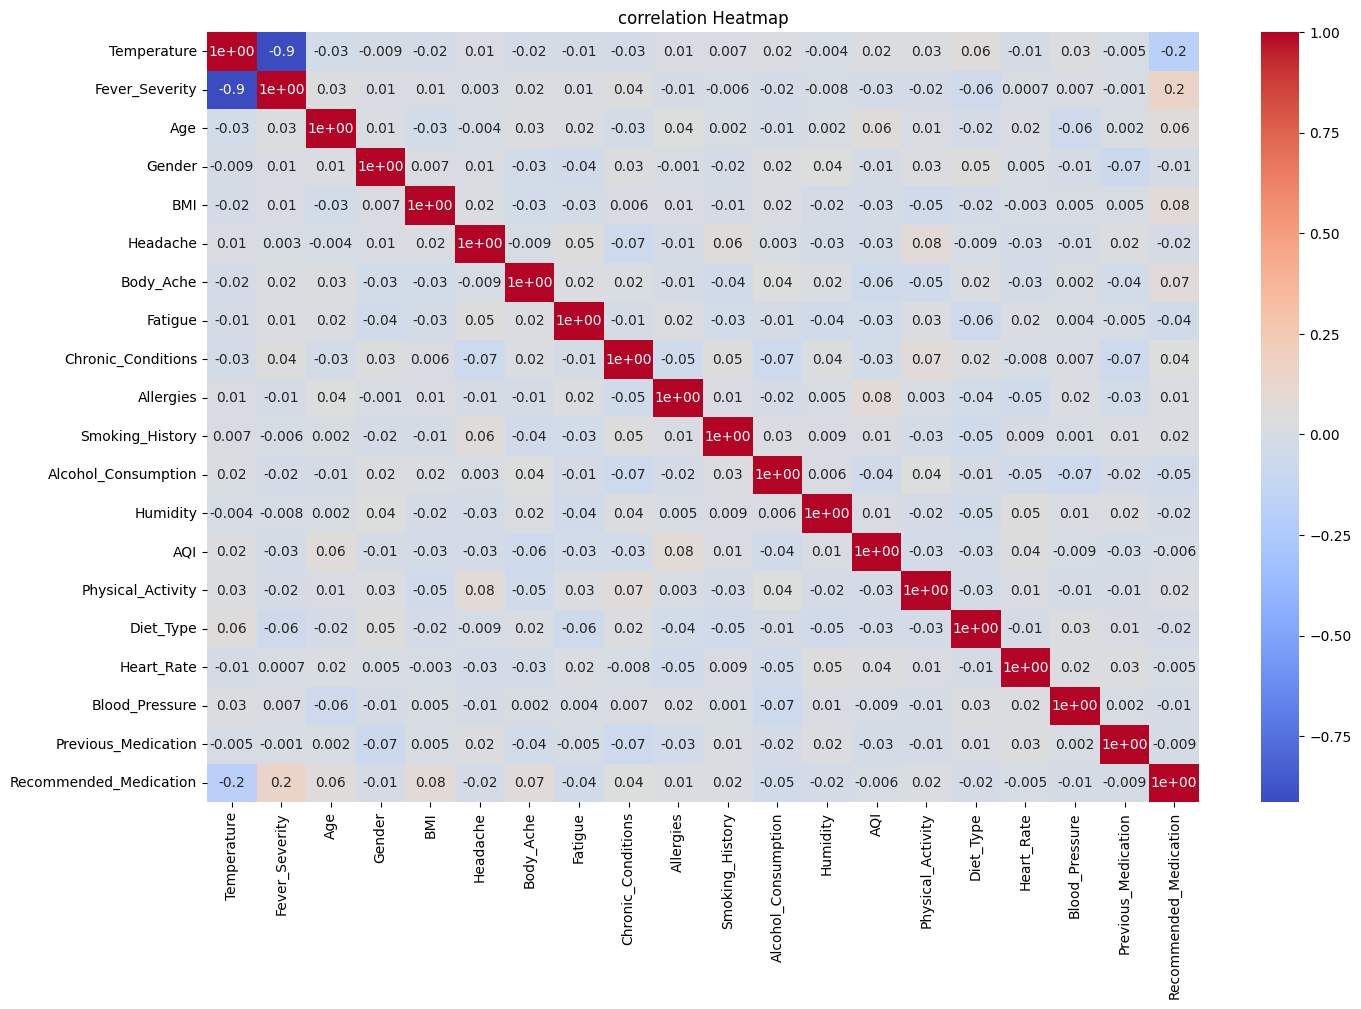

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix =Data.corr()
print(corr_matrix)

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt="0.0")
plt.title("correlation Heatmap")

In [ ]:
y = Data['Recommended_Medication']
x=Data[['Fever_Severity','Body_Ache','Age','BMI','Chronic_Conditions']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
scalar.fit(x)

StandardScaler()

In [ ]:
standard_data=scalar.transform(x)

In [ ]:
x=standard_data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((700, 5), (700,), (300, 5), (300,))

In [ ]:
standard_data

array([[ 1.47637931,  0.97043679,  1.31148388, -0.49827386, -1.03252879],
       [ 0.3074329 , -1.03046381,  1.48474057,  0.03431074,  0.968496  ],
       [ 1.47637931, -1.03046381,  1.4154379 ,  0.28011902, -1.03252879],
       ...,
       [ 1.47637931,  0.97043679, -1.49527458,  0.64883143, -1.03252879],
       [-0.8615135 , -1.03046381,  1.2421812 , -0.25246558, -1.03252879],
       [-0.8615135 ,  0.97043679,  0.47985174, -0.0885934 , -1.03252879]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()



In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
prediction=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
training_acccuracy=accuracy_score(prediction,y_test)
testing_acccuracy=accuracy_score(prediction,y_test)

In [ ]:
print(training_acccuracy,testing_acccuracy)

0.8133333333333334 0.8133333333333334
